In [4]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
import pandas as pd

linux_mem1 = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_memory1.csv')
linux_mem2 = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_memory2.csv')
linux_mem = pd.concat([linux_mem1, linux_mem2])

print(linux_mem.shape)
linux_mem.head()

(2000000, 13)


,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,CMD,label,type
0,1554218915,3257,859502,54,193,2.0,519.1,2.0,519.1,0.14,Web-Content,0,normal
1,1554218920,3197,247354,95,193,2.6,402.0,2.6,402.0,0.11,firefox,0,normal
2,1554218925,1442,57311,33,2219,764.2,290.7,764.2,290.7,0.08,Xorg,0,normal
3,1554218930,3119,68006,17,3063,725.9,116.8,725.9,116.8,0.03,update-manager,0,normal
4,1554218935,2797,72300,69,1350,1.4,109.6,1.4,109.6,0.03,nautilus,0,normal


In [7]:
linux_mem.drop('ts', axis = 1, inplace=True)
linux_mem.drop('type', axis = 1, inplace= True)

linux_mem.head()

,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,CMD,label
0,3257,859502,54,193,2.0,519.1,2.0,519.1,0.14,Web-Content,0
1,3197,247354,95,193,2.6,402.0,2.6,402.0,0.11,firefox,0
2,1442,57311,33,2219,764.2,290.7,764.2,290.7,0.08,Xorg,0
3,3119,68006,17,3063,725.9,116.8,725.9,116.8,0.03,update-manager,0
4,2797,72300,69,1350,1.4,109.6,1.4,109.6,0.03,nautilus,0


In [8]:
linux_mem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PID     int64  
 1   MINFLT  object 
 2   MAJFLT  object 
 3   VSTEXT  object 
 4   VSIZE   float64
 5   RSIZE   object 
 6   VGROW   object 
 7   RGROW   object 
 8   MEM     float64
 9   CMD     object 
 10  label   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 183.1+ MB


In [9]:
linux_mem.isnull().sum().sum()

0

In [10]:
linux_mem['VGROW'] = (linux_mem['VGROW'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['VGROW'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B', ' '], [10**3, 10**6, 10**9, '']).astype(int))

linux_mem['MINFLT'] = (linux_mem['MINFLT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['MINFLT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['MAJFLT'] = (linux_mem['MAJFLT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['MAJFLT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['VSTEXT'] = (linux_mem['VSTEXT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['VSTEXT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['RGROW'] = (linux_mem['RGROW'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['RGROW'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['RSIZE'] = (linux_mem['RSIZE'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['RSIZE'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_mem['CMD'] = le.fit_transform(linux_mem['CMD'])

col:  PID


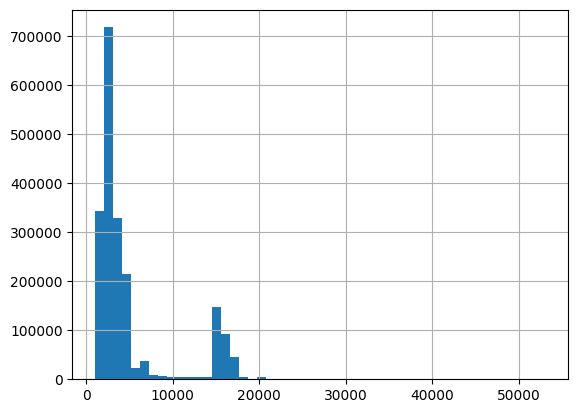

col:  MINFLT


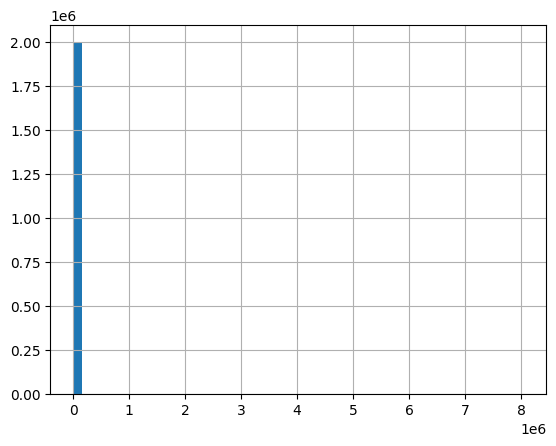

col:  MAJFLT


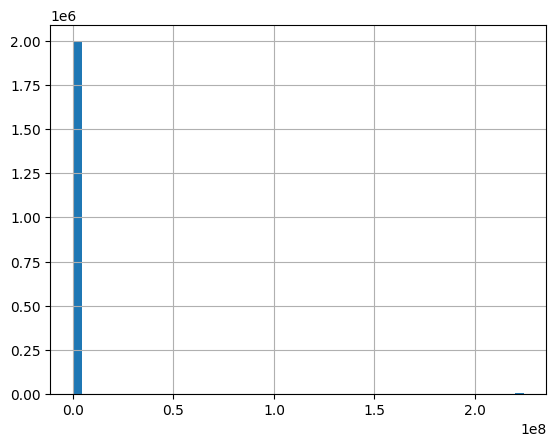

col:  VSTEXT


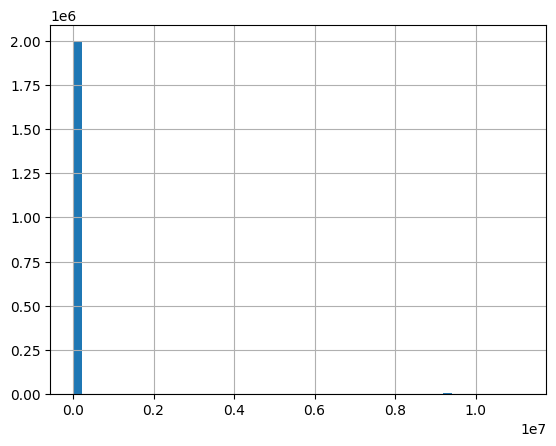

col:  VSIZE


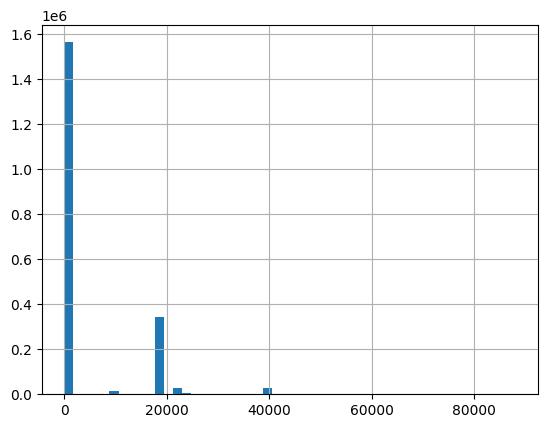

col:  RSIZE


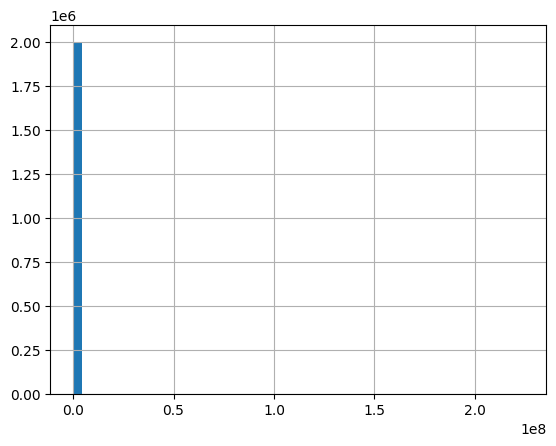

col:  VGROW


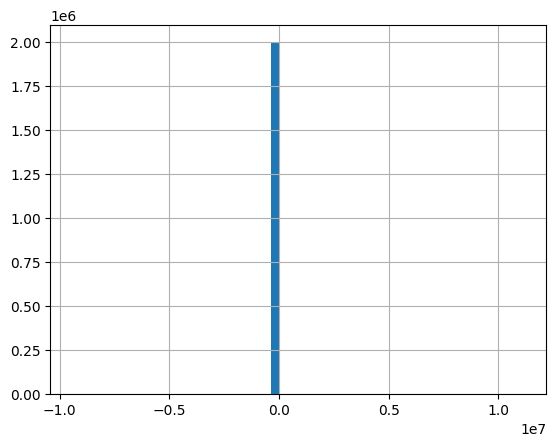

col:  RGROW


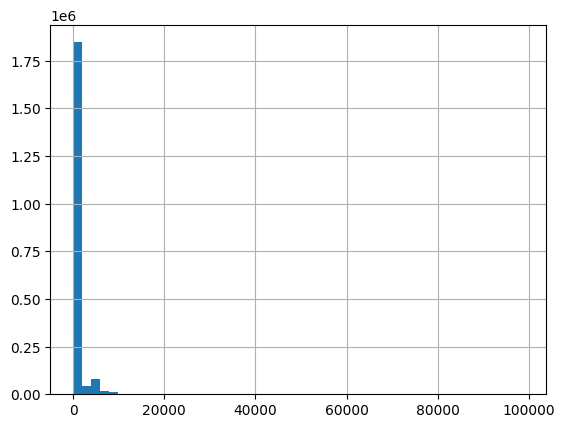

col:  MEM


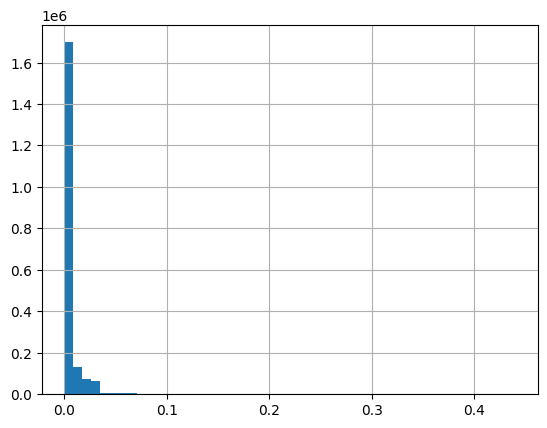

col:  CMD


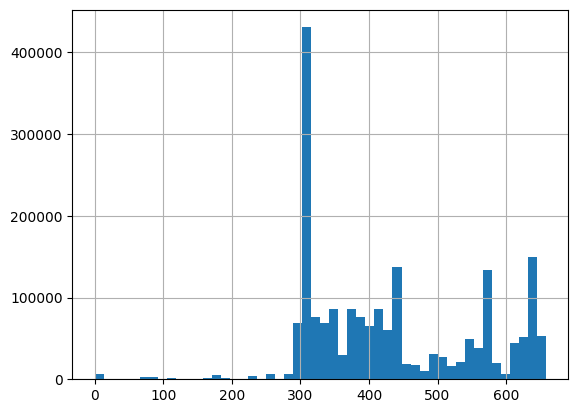

col:  label


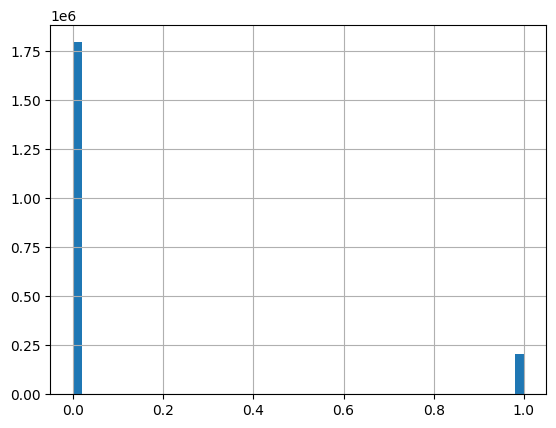

In [12]:
import matplotlib.pyplot as plt
columns = linux_mem.columns
for col in columns:
    print("col: ", col)
    linux_mem[col].hist(bins = 50)
    plt.show()

In [13]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [14]:
from sklearn.metrics import f1_score, accuracy_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

In [15]:
x = linux_mem.drop('label', axis = 1)
y = linux_mem['label']

# **Logistic Regression**

In [16]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [17]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of LR: ",lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of LR: ",lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
print('AUC Score of LR:',lrAuc)

[0 0 0 ... 0 0 0]
Accuracy of LR:  79.0
f1_score of LR:  21.77
AUC Score of LR: 56.61


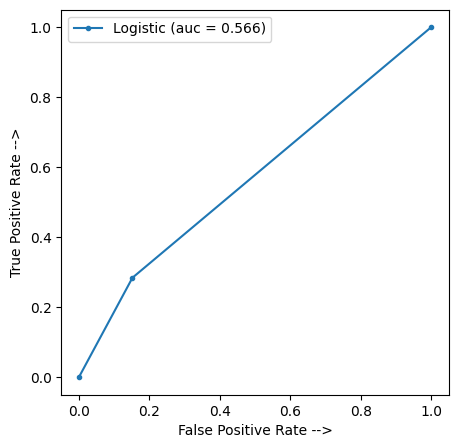

In [18]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

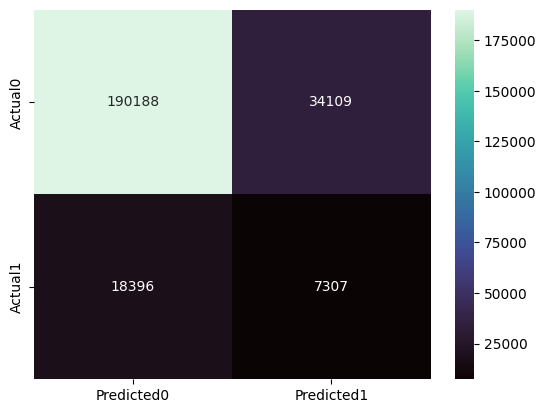

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

# **Oversampling**

In [20]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1570080, 1: 179920}
After oversampling {0: 1570080, 1: 1570080}


In [21]:
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
ovr_lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of lr after oversampling:",ovr_lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
ovr_lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of lr after oversampling:",ovr_lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
ovr_lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
print('AUC Score of lr after oversampling:', ovr_lrAuc)

[0 0 0 ... 0 0 0]
Accuracy of lr after oversampling: 56.81
f1_score of lr after oversampling: 40.75
AUC Score of lr after oversampling: 56.81


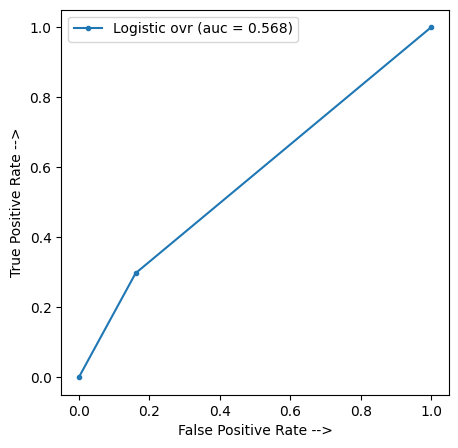

In [22]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic ovr (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


<AxesSubplot: >

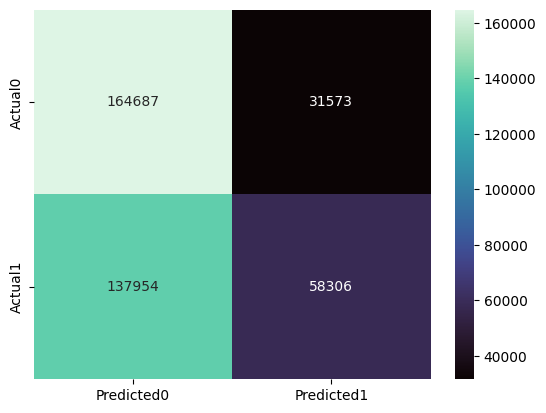

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

# Result when we use undersampling on the data

In [24]:
x = linux_mem.drop('label', axis = 1)
y = linux_mem['label']

In [25]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_unsampled, y_unsampled = rus.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_unsampled))

Before undersampling Counter({0: 1570080, 1: 179920})
After undersampling Counter({0: 179920, 1: 179920})


In [26]:
# --------------------------Logistic Reg -----------------------------------

for train_index, test_index in skf.split(x_unsampled, y_unsampled):
    x_train, x_test, y_train, y_test = x_unsampled.iloc[train_index], x_unsampled.iloc[test_index], y_unsampled.iloc[train_index], y_unsampled.iloc[test_index]

lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
und_lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of lr undersampled : ",und_lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
und_lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of lr undersampled: ",und_lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
try:
  und_lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
  print('AUC Score of lr undersampled:', und_lrAuc)
except ValueError:
    pass

[0 0 0 ... 0 1 0]
Accuracy of lr undersampled :  59.28
f1_score of lr undersampled:  47.93
AUC Score of lr undersampled: 59.28


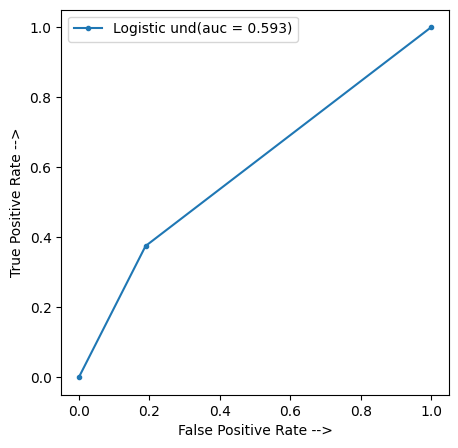

In [29]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic und(auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

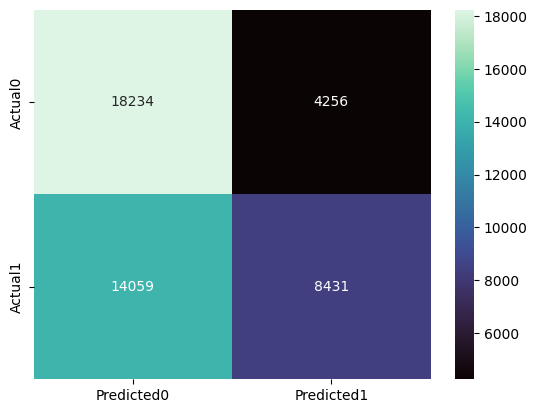

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

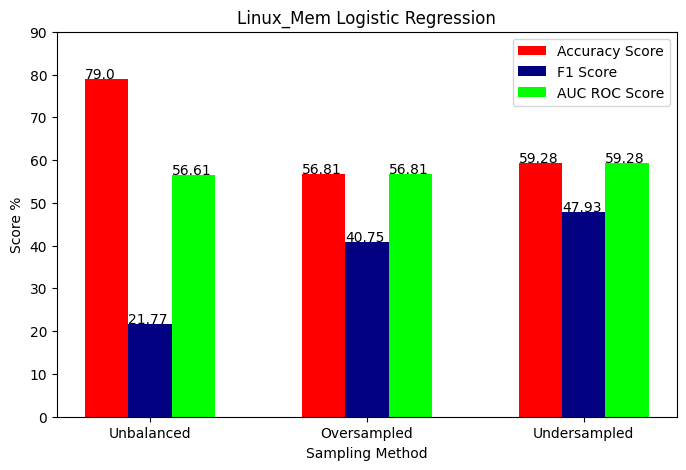

In [32]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [lrAccuracy, ovr_lrAccuracy, und_lrAccuracy]
all_f1_scores = [lrF1, ovr_lrF1, und_lrF1]
all_auc_roc_scores = [lrAuc, ovr_lrAuc, und_lrAuc]

x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 5))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Linux_Mem Logistic Regression')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([0, 90])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()